In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Vehicle analysis prediction.csv')

In [ ]:
df

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0,16990
...,...,...,...,...,...,...,...,...,...,...,...
4955,16898,merc,GL Class,2015,Automatic,24314,Diesel,125,56.6,2.1,17999
4956,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145,51.4,3.0,28900
4957,15453,vw,CC,2015,Manual,84932,Diesel,30,60.1,2.0,8998
4958,14666,audi,A7,2017,Semi-Auto,30150,Diesel,145,62.8,3.0,23198


In [ ]:
df1=df.drop(columns='carID')

In [ ]:
df1.isnull().sum()

,0
brand,0
model,0
year,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0
price,0


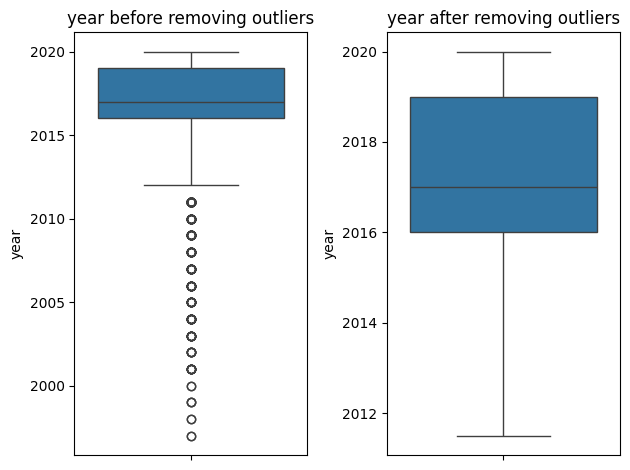

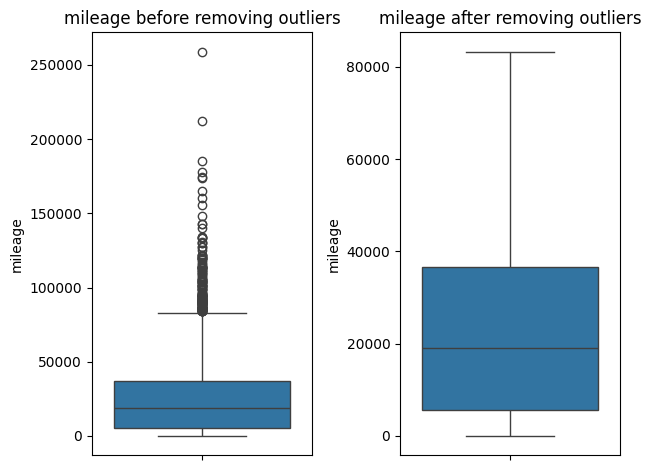

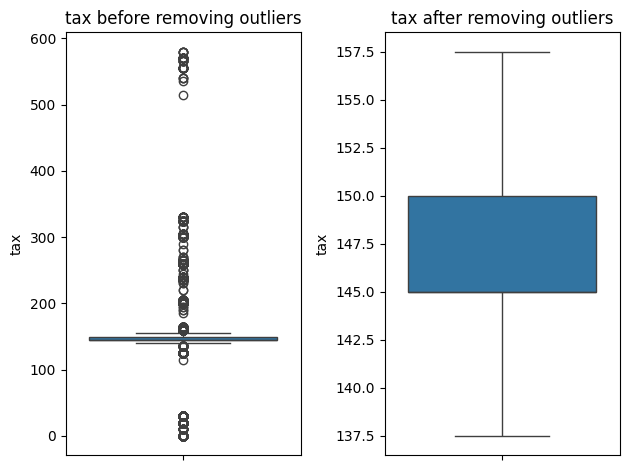

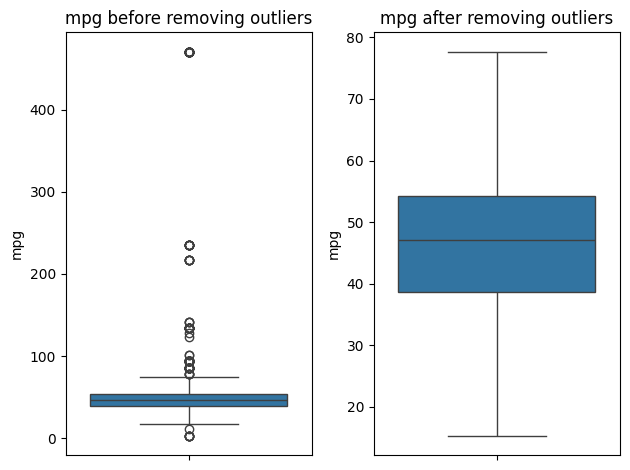

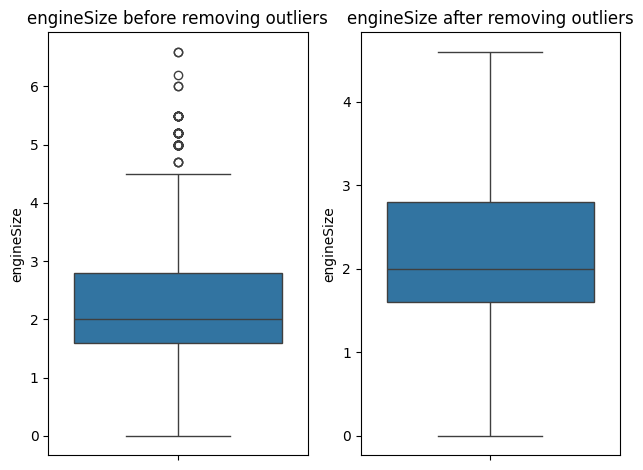

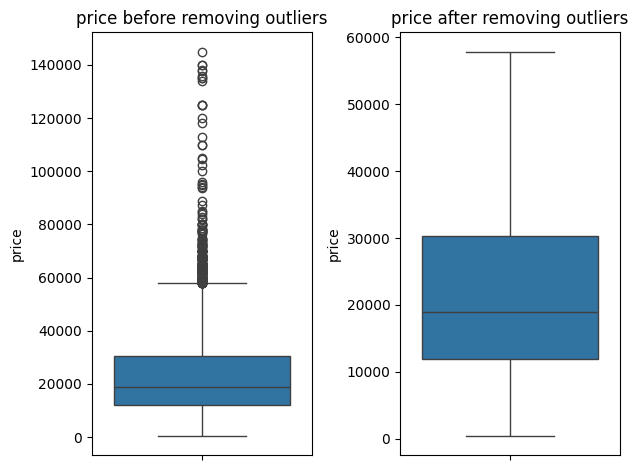

In [ ]:
for i in df1.columns:
  if df1[i].dtype != object:
    plt.subplot(1,2,1)
    sns.boxplot(df1[i])
    plt.title(f"{i} before removing outliers")

    q1=df1[i].quantile(0.25)
    q3=df1[i].quantile(0.75)
    iqr = q3-q1
    l=q1-1.5*iqr
    u=q3+1.5*iqr
    df1[i]=[l if x < l else u if x>u else x for x in df1[i]]

    plt.subplot(1,2,2)
    sns.boxplot(df1[i])
    plt.title(f"{i} after removing outliers")
    plt.tight_layout()
    plt.show()

DATA VISUVALIZATION


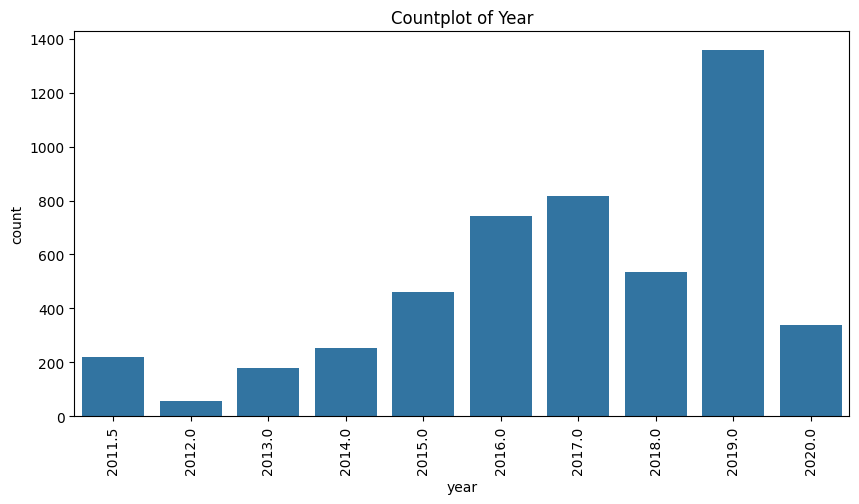

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="year", data=df1)
plt.title("Countplot of Year")
plt.xticks(rotation=90)
plt.show()


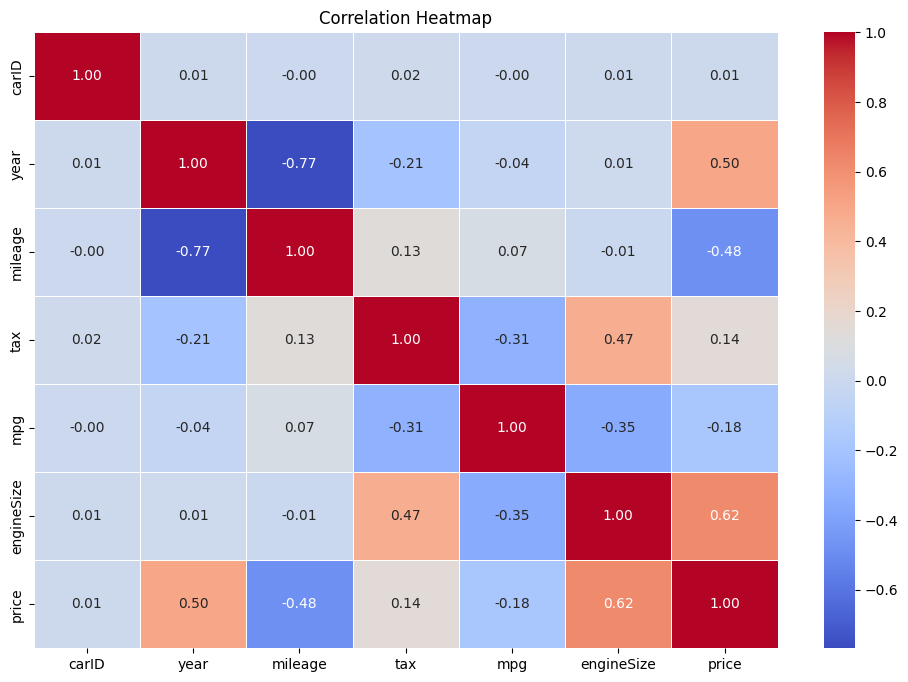

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

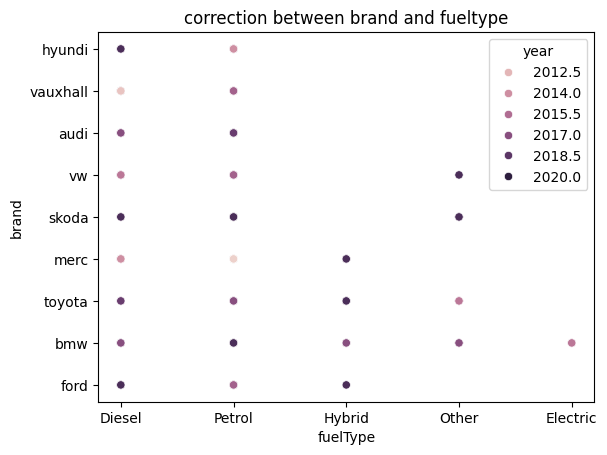

In [ ]:
sns.scatterplot(x='fuelType',y='brand',data=df1,hue='year')
plt.title('correction between brand and fueltype')
plt.show()

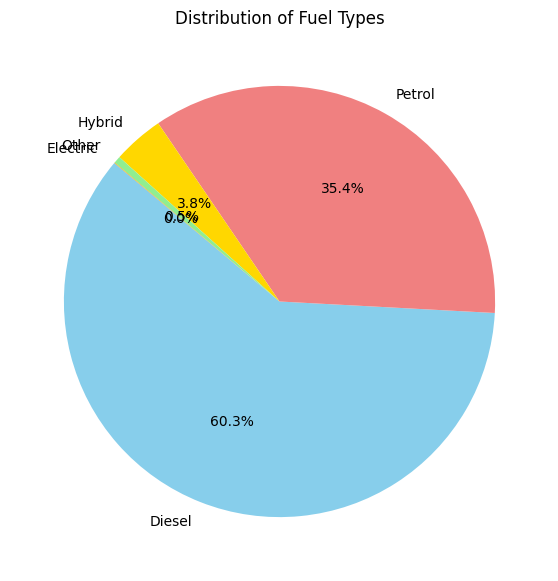

In [ ]:
fuel_counts = df["fuelType"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'gold', 'lightgreen', 'orange'])
plt.title("Distribution of Fuel Types")
plt.show()

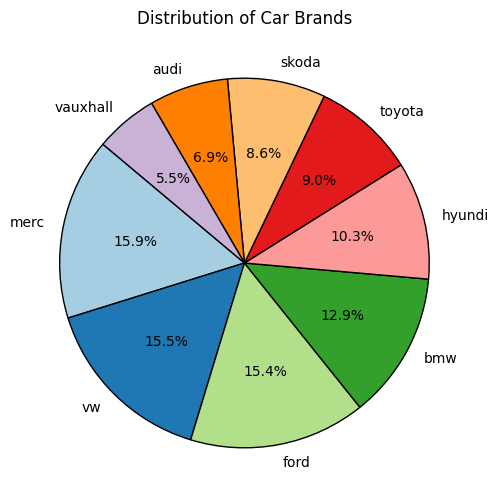

In [ ]:
brand_counts = df["brand"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140,
        colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Car Brands")
plt.show()


Text(0.5, 1.0, 'fuelType vs price Distribution')

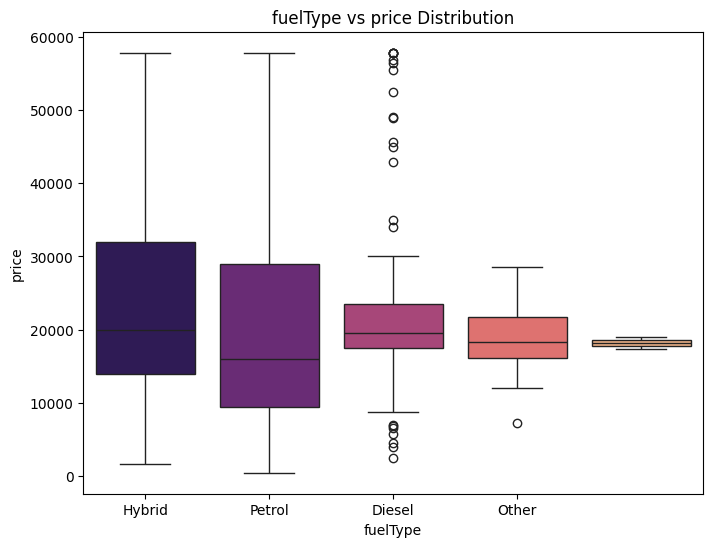

In [ ]:
plt.figure(figsize=(8, 6))
x_ticks = [0, 1, 2, 3]
x_tick_labels = ['Hybrid', 'Petrol', 'Diesel','Other']
ax=sns.boxplot(x='fuelType', y='price', data=df1, palette='magma')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels)
plt.xlabel("fuelType")
plt.ylabel("price")
plt.title("fuelType vs price Distribution")

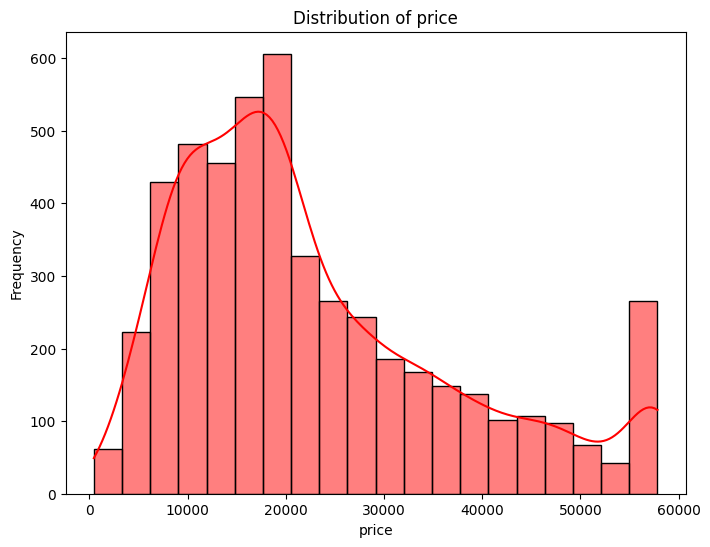

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df1["price"], bins=20,kde=True, color='red', edgecolor='black')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of price')
plt.show()

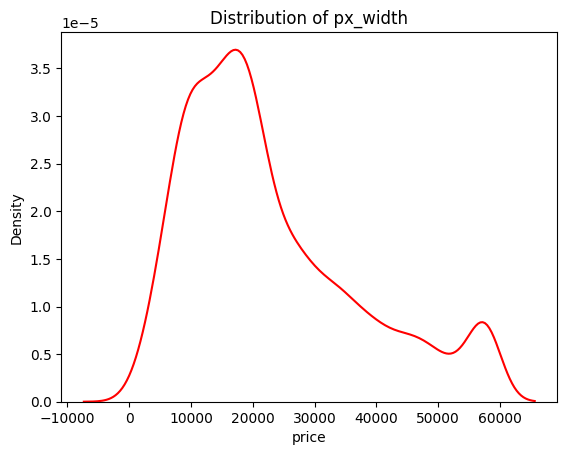

In [ ]:
sns.kdeplot(df1['price'],color='red')
plt.title('Distribution of px_width')
plt.show()

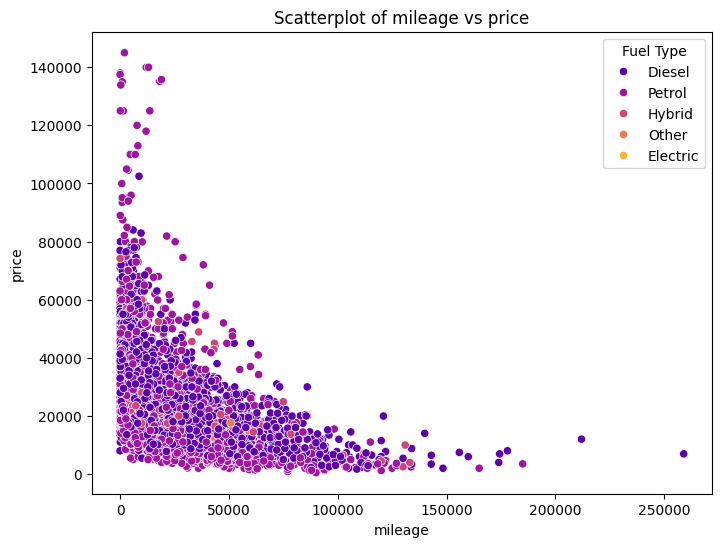

In [ ]:
x_column = "mileage"  # Change this to a numerical column
y_column = "price"    # Change this to another numerical column

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[x_column], y=df[y_column], hue=df["fuelType"], palette="plasma")

# Set labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f"Scatterplot of {x_column} vs {y_column}")

# Show the plot
plt.legend(title="Fuel Type")
plt.show()


In [ ]:

encoding = dict()
for i in df1.columns:
  if df1[i].dtype == object:
    indexes = list(df1[i].unique())
    df1[i] = [indexes.index(x) for x in df1[i]]


In [ ]:
df1

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,0,0,2019.0,0,4223.000,0,145.0,39.8,2.2,31995.000
1,1,1,2015.0,1,47870.000,0,137.5,60.1,2.0,7700.000
2,2,2,2019.0,2,5151.000,1,145.0,29.1,2.9,57839.375
3,3,3,2016.0,2,20423.000,0,137.5,57.6,2.0,12999.000
4,4,4,2020.0,0,3569.000,1,145.0,47.1,1.0,16990.000
...,...,...,...,...,...,...,...,...,...,...
4955,5,18,2015.0,2,24314.000,0,137.5,56.6,2.1,17999.000
4956,7,17,2017.0,2,18000.000,0,145.0,51.4,3.0,28900.000
4957,3,44,2015.0,1,83293.125,0,137.5,60.1,2.0,8998.000
4958,2,57,2017.0,0,30150.000,0,145.0,62.8,3.0,23198.000


In [ ]:
x=df1.drop(columns='price')
y=df1['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [ ]:
acc=[]
models={'LinearRegression':LinearRegression(),'DecisionTreeRegressor':DecisionTreeRegressor(),'RandomForestRegressor':RandomForestRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),'XGBRegressor':XGBRegressor()}
for i,j in models.items():
  model = j
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  acc.append([i,r2_score(model.predict(x_train),y_train)*100,r2_score(y_pred,y_test)*100,mean_squared_error(y_pred,y_test),mean_absolute_error(y_pred,y_test)])
  print(f"{i} accuracy is : {r2_score(y_pred,y_test)}")

LinearRegression accuracy is : 0.6390902815239721
DecisionTreeRegressor accuracy is : 0.9116894725855083
RandomForestRegressor accuracy is : 0.9430129281721927
GradientBoostingRegressor accuracy is : 0.9161978382559626
XGBRegressor accuracy is : 0.9562012230351887


In [ ]:
acc=pd.DataFrame(acc,columns=['Model Type','Training accuracy','Testing Accuracy','Mean_squared_error','mean_absolute_error'])

In [ ]:
display(acc)

,Model Type,Training accuracy,Testing Accuracy,Mean_squared_error,mean_absolute_error
0,LinearRegression,66.965968,63.909028,5.348461e+07,5153.292149
1,DecisionTreeRegressor,99.980970,91.168947,1.766888e+07,2399.901574
2,RandomForestRegressor,99.203782,94.301293,1.061736e+07,2029.650927
3,GradientBoostingRegressor,93.063422,91.619784,1.476107e+07,2691.980578
4,XGBRegressor,99.442702,95.620122,8.345880e+06,1858.185453
